# Analysis of wandb sweep results

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import wandb
from tqdm.notebook import tqdm


## Load data

In [2]:
sweep_ids = ['9n3mfcu8', 'aql7xlp8']
sweep_paths = [f'm2snn/eventprop/{id}' for id in sweep_ids]
api = wandb.Api()
sweeps = [api.sweep(path) for path in sweep_paths]

In [3]:
parameters = list(sweeps[0].config['parameters'].keys())
plot_data = {param: [] for param in parameters}
plot_data.update({'sweep_id': [], 'run_id' : [], 'test_acc' : [], 'test_loss' : []})
for sweep in sweeps : 
    for run in tqdm(sweep.runs) : 
        if 'mean_test_acc' not in run.summary.keys() : 
            continue
        plot_data['sweep_id'].append(sweep.id)
        plot_data['run_id'].append(run.id)

        plot_data['test_acc'].append(run.summary['mean_test_acc'])
        plot_data['test_loss'].append(run.summary['mean_test_loss'])
        for param in parameters : 
            plot_data[param].append(run.config[param])
        

  0%|          | 0/335 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

In [4]:
plot_data = pd.DataFrame.from_dict(plot_data)
parameters

['batch_size',
 'dropout',
 'gamma',
 'input_dropout',
 'lr',
 'model_type',
 'n_hid',
 'scale',
 'weight_decay']

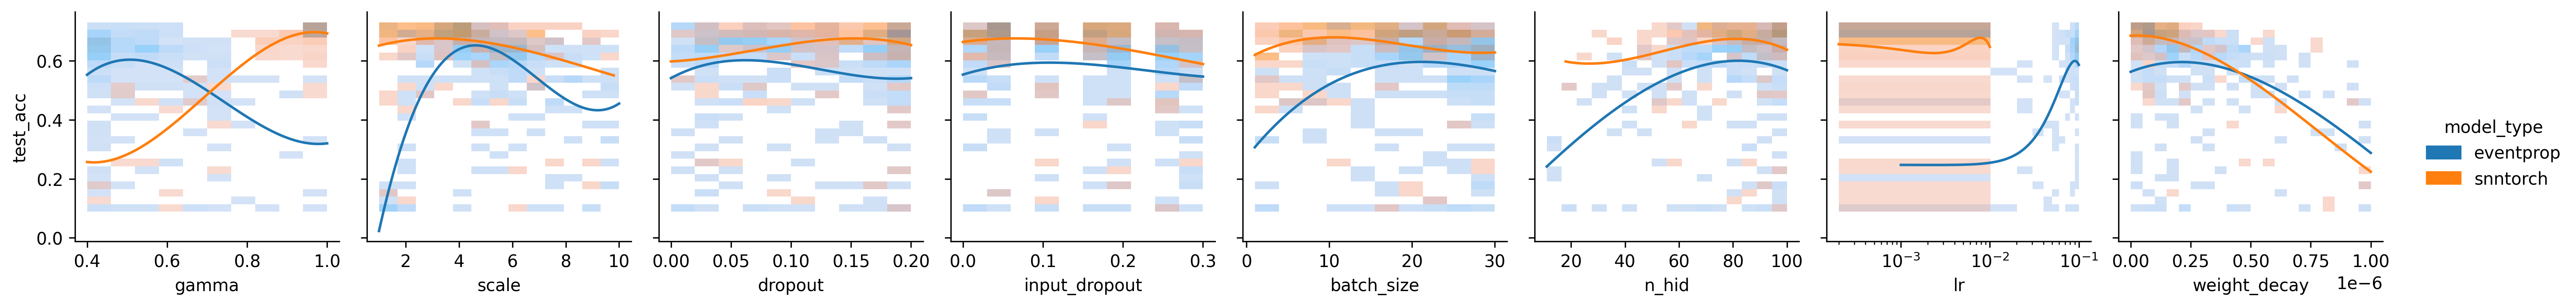

In [14]:
p_plot = sns.pairplot(plot_data, x_vars={p for p in parameters if p!='model_type'}  , y_vars=['test_acc'], hue='model_type', kind='hist', plot_kws=dict(alpha=0.5))
# p_plot.fig.set_tight_layout(True)
p_plot.fig.dpi = 300
for model_type in plot_data['model_type'].unique() :
    for ax in p_plot.axes[0] : 
        f_data = plot_data[plot_data['model_type'] == model_type]
        x, y = ax.get_xlabel(), ax.get_ylabel()
        z = np.polyfit(f_data[x], f_data[y], 3)
        p = np.poly1d(z)
        x_values = np.linspace(min(f_data[x]), max(f_data[x]), 100)
        y_values = p(x_values)
        ax.plot(x_values, y_values)
        if x == 'lr' : 
            ax.set_xscale('log')


In [ ]:
_, new_axs = plt.subplots(3, 3, figsize=(15, 15))
for n_ax, ax in zip(new_axs.flatten(), p_plot.axes.flatten()) : 
    n_ax = ax

In [51]:
parameters.remove('batch_size')

['batch_size',
 'dropout',
 'gamma',
 'input_dropout',
 'lr',
 'model_type',
 'n_hid',
 'scale',
 'weight_decay']